In [2]:
import numpy as np
import pandas as pd 
import seaborn as sbn
import matplotlib.pyplot as plt

In [3]:
match_data=pd.read_csv("archive/matches.csv")
deliveries=pd.read_csv('archive/deliveries.csv')

In [4]:
match_data.head(3)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar


In [5]:
deliveries.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN


In [6]:
match_data.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [7]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [8]:
match_data.shape

(1095, 20)

In [9]:
deliveries.shape

(260920, 17)

In [10]:
match_data.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [11]:
print("Matches played so far:",match_data.shape[0])
print('\n Cities played at:',match_data['city'].unique())
print('\n Teams Played', match_data['team1'].unique())

Matches played so far: 1095

 Cities played at: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah'
 'Navi Mumbai' 'Lucknow' 'Guwahati' 'Mohali']

 Teams Played ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals'
 'Punjab Kings' 'Lucknow Super Giants' 'Gujarat Titans'
 'Royal Challengers Bengaluru']


In [12]:
match_per_season=match_data.groupby(['season'])['id'].count().reset_index().rename(columns={'id':'Matches'})
match_per_season

,season,Matches
0,2007/08,58
1,2009,57
2,2009/10,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


Text(0.5, 1.0, 'Total Matches Played in Each Season')

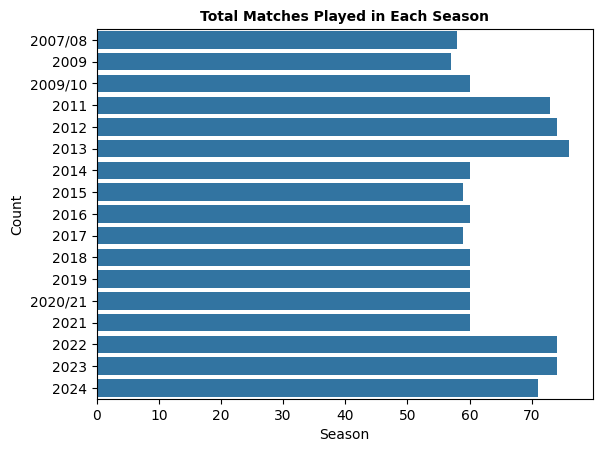

In [13]:
sbn.countplot(match_data['season'])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Season',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.title('Total Matches Played in Each Season',fontsize=10,fontweight="bold")

In [14]:
season_data=match_data[['id','season']].merge(deliveries,left_on='id',right_on='match_id',how='left').drop('id',axis=1)
season_data.head(4)

,season,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,2007/08,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,2007/08,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,2007/08,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,2007/08,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


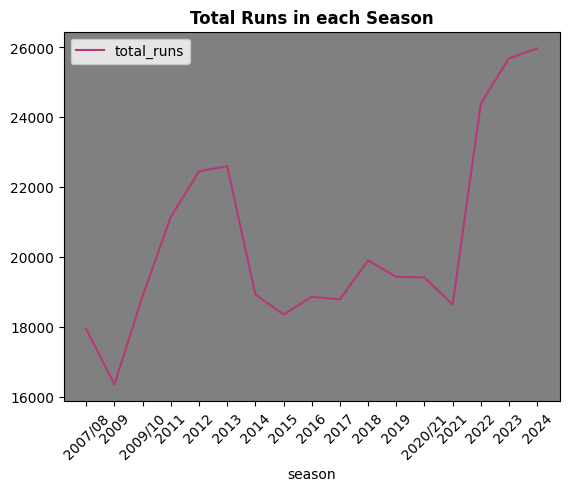

In [15]:
seasons=season_data.groupby(['season'])['total_runs'].sum().reset_index()
p=seasons.set_index('season')
ax=plt.axes()
plt.xticks(rotation=45,fontsize=10)
ax.set(facecolor='grey')
sbn.lineplot(data=p,palette='magma')
plt.title('Total Runs in each Season',fontsize=12,fontweight='bold')
plt.show()

In [16]:
match_per_season

,season,Matches
0,2007/08,58
1,2009,57
2,2009/10,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


In [17]:
seasons

,season,total_runs
0,2007/08,17937
1,2009,16353
2,2009/10,18883
3,2011,21154
4,2012,22453
5,2013,22602
6,2014,18931
7,2015,18353
8,2016,18862
9,2017,18786


In [18]:
runs_per_season=pd.concat([match_per_season,seasons.iloc[:,1]],axis=1)
runs_per_season['Runs Scored Per Match']=runs_per_season['total_runs']/runs_per_season['Matches']
runs_per_season.set_index('season',inplace=True)
runs_per_season

,Matches,total_runs,Runs Scored Per Match
season,,,
2007/08,58,17937,309.258621
2009,57,16353,286.894737
2009/10,60,18883,314.716667
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22602,297.394737
2014,60,18931,315.516667
2015,59,18353,311.067797
2016,60,18862,314.366667


In [19]:
runs_per_season['Runs Scored Per Match'].max()

np.float64(365.7887323943662)

/var/folders/tz/7hwjwyrx3w534bszd3hld6hw0000gn/T/ipykernel_26090/1450683225.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sbn.barplot(y=toss.index,x=toss,orient='h',palette='icefire',saturation=1)


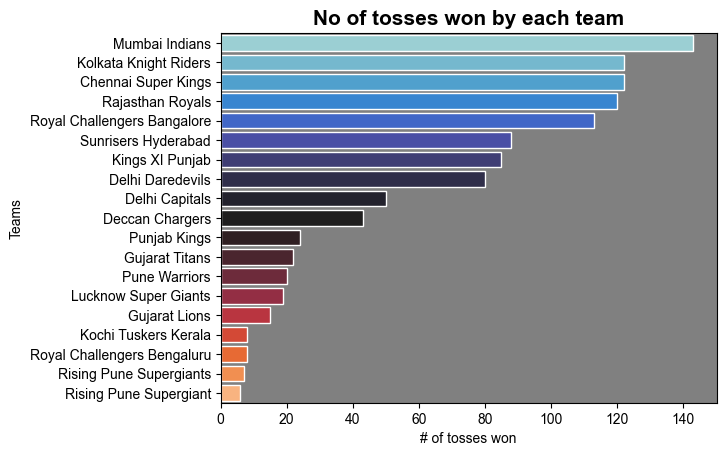

In [20]:
toss=match_data['toss_winner'].value_counts()
ax=plt.axes()
ax.set(facecolor='grey')
sbn.set(rc={'figure.figsize':(15,10)},style='darkgrid')
ax.set_title('No of tosses won by each team',fontsize=15,fontweight='bold')
sbn.barplot(y=toss.index,x=toss,orient='h',palette='icefire',saturation=1)
plt.xlabel('# of tosses won')
plt.ylabel('Teams')
plt.show()

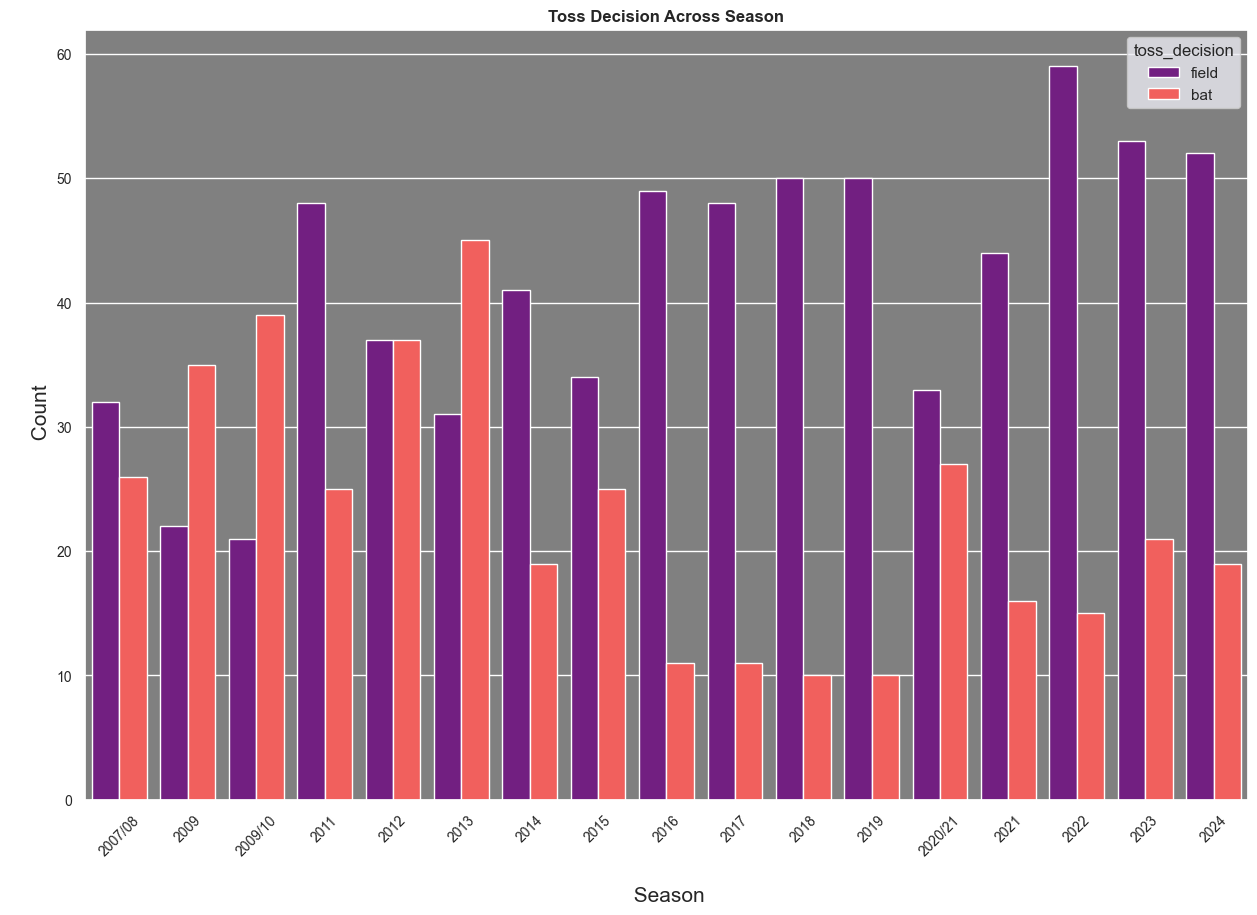

In [23]:
ax=plt.axes()
ax.set(facecolor='grey')
sbn.countplot(x='season',hue='toss_decision',data=match_data,palette='magma',saturation=1)
plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n Season',fontsize=15)
plt.ylabel('\n Count',fontsize=15)
plt.title('Toss Decision Across Season',fontsize=12,fontweight='bold')
plt.show()

In [25]:
match_data['result'].value_counts()

result
wickets      578
runs         498
tie           14
no result      5
Name: count, dtype: int64

In [26]:
match_data.venue[match_data.result!='runs'].mode()

0    Eden Gardens
Name: venue, dtype: object

In [27]:
match_data.venue[match_data.result!='wickets'].mode()

0    Wankhede Stadium
Name: venue, dtype: object

In [29]:
match_data.venue[match_data.toss_winner=='Mumbai Indians'][match_data.winner=='Mumbai Indians'].value_counts()

venue
Wankhede Stadium                                                    23
Wankhede Stadium, Mumbai                                             7
M Chinnaswamy Stadium                                                6
Brabourne Stadium                                                    4
Eden Gardens                                                         4
Arun Jaitley Stadium, Delhi                                          3
Sharjah Cricket Stadium                                              3
Dr DY Patil Sports Academy                                           2
Maharashtra Cricket Association Stadium                              2
Zayed Cricket Stadium, Abu Dhabi                                     2
MA Chidambaram Stadium, Chepauk, Chennai                             2
Sheikh Zayed Stadium                                                 2
Holkar Cricket Stadium                                               2
Punjab Cricket Association Stadium, Mohali                           2


In [30]:
match_data.venue[match_data.winner=='Mumbai Indians'].value_counts()

venue
Wankhede Stadium                                                      42
Eden Gardens                                                          10
Wankhede Stadium, Mumbai                                              10
M Chinnaswamy Stadium                                                  8
Sheikh Zayed Stadium                                                   6
Rajiv Gandhi International Stadium, Uppal                              5
Brabourne Stadium                                                      5
Dr DY Patil Sports Academy                                             5
MA Chidambaram Stadium, Chepauk                                        3
MA Chidambaram Stadium, Chepauk, Chennai                               3
Arun Jaitley Stadium, Delhi                                            3
Punjab Cricket Association Stadium, Mohali                             3
Dubai International Cricket Stadium                                    3
Sharjah Cricket Stadium                      

In [31]:
match_data.winner[match_data.result!='runs'].mode()

0    Kolkata Knight Riders
Name: winner, dtype: object

In [32]:
match_data.winner[match_data.result!='wickets'].mode()

0    Mumbai Indians
Name: winner, dtype: object

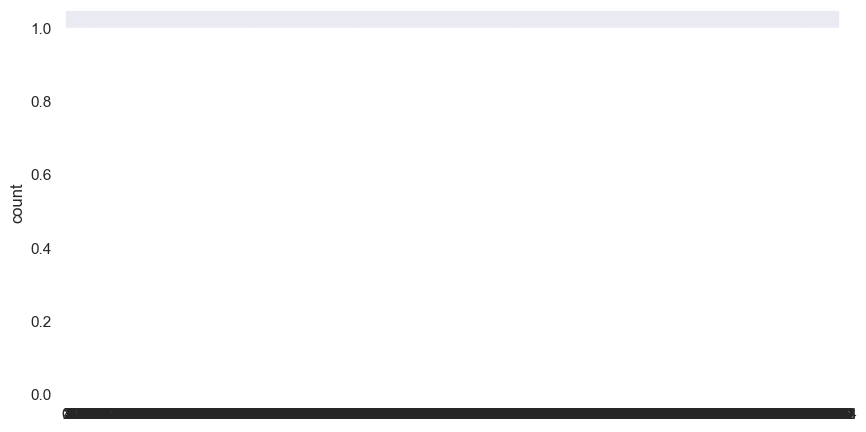

In [36]:
toss=match_data['toss_winner']==match_data['winner']
plt.figure(figsize=(10,5))
sbn.countplot(toss)
plt.show()

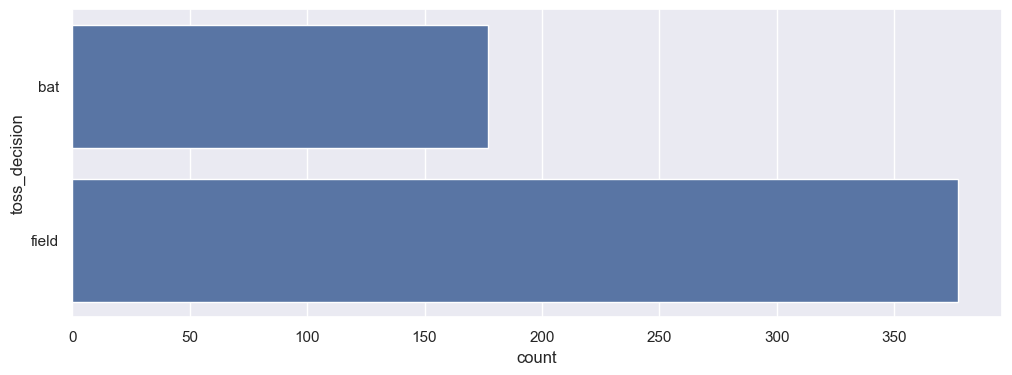

In [37]:
plt.figure(figsize=(12,4))
sbn.countplot(match_data.toss_decision[match_data.winner==match_data.toss_winner])
plt.show()

In [40]:
player=(deliveries['batter']=='SK Raina')
df_raina=deliveries[player]
df_raina.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
270,335983,1,Chennai Super Kings,Kings XI Punjab,7,2,SK Raina,JR Hopes,MEK Hussey,1,0,1,NaN,0,NaN,NaN,NaN
273,335983,1,Chennai Super Kings,Kings XI Punjab,7,5,SK Raina,JR Hopes,MEK Hussey,6,0,6,NaN,0,NaN,NaN,NaN
274,335983,1,Chennai Super Kings,Kings XI Punjab,7,6,SK Raina,JR Hopes,MEK Hussey,0,0,0,NaN,0,NaN,NaN,NaN
276,335983,1,Chennai Super Kings,Kings XI Punjab,8,2,SK Raina,IK Pathan,MEK Hussey,4,0,4,NaN,0,NaN,NaN,NaN
277,335983,1,Chennai Super Kings,Kings XI Punjab,8,3,SK Raina,IK Pathan,MEK Hussey,1,0,1,NaN,0,NaN,NaN,NaN


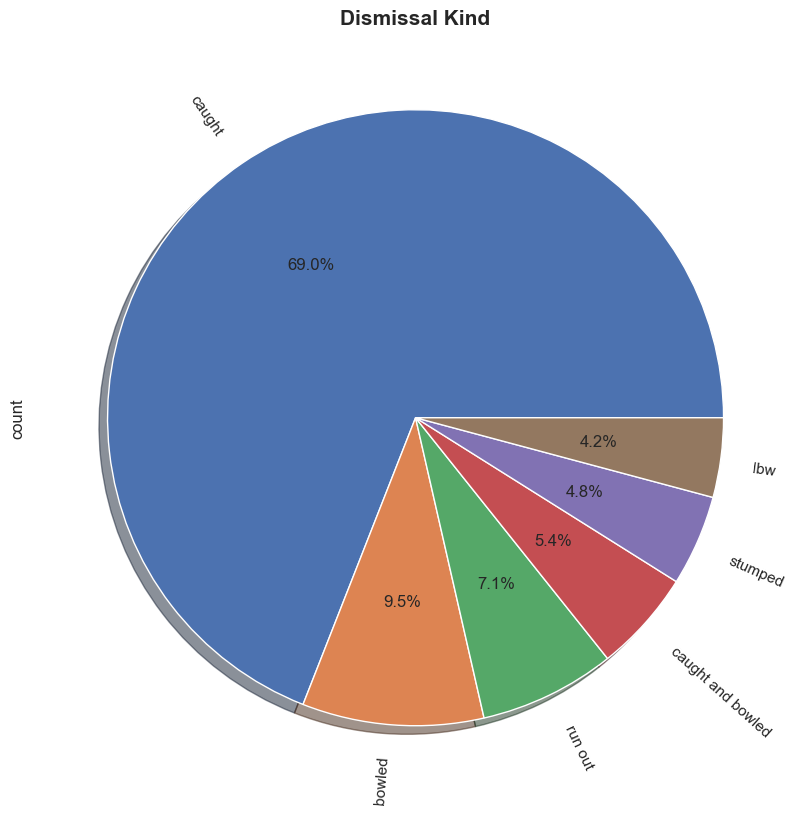

In [41]:
df_raina['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,rotatelabels=True)
plt.title('Dismissal Kind',fontweight='bold',fontsize=15)
plt.show()

In [42]:
def count(df_raina,runs):
    return len(df_raina[df_raina['batsman_runs']==runs])*runs

In [43]:
print("Runs scored from 1's :", count(df_raina,1))
print("Runs scored from 2's :", count(df_raina,2))
print("Runs scored from 3's :", count(df_raina,3))
print("Runs scored from 4's :", count(df_raina,4))
print("Runs scored from 6's :", count(df_raina,6))

Runs scored from 1's : 1708
Runs scored from 2's : 542
Runs scored from 3's : 33
Runs scored from 4's : 2024
Runs scored from 6's : 1224


In [46]:
runs=deliveries.groupby(['batter'])['batsman_runs'].sum().reset_index()
runs.columns=['Batsman','runs']
y=runs.sort_values(by='runs',ascending=False).head(10).reset_index().drop('index',axis=1)
y

,Batsman,runs
0,V Kohli,8014
1,S Dhawan,6769
2,RG Sharma,6630
3,DA Warner,6567
4,SK Raina,5536
5,MS Dhoni,5243
6,AB de Villiers,5181
7,CH Gayle,4997
8,RV Uthappa,4954
9,KD Karthik,4843


/var/folders/tz/7hwjwyrx3w534bszd3hld6hw0000gn/T/ipykernel_26090/2643238837.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.barplot(x=y['Batsman'],y=y['runs'],palette='rocket',saturation=1)


Text(0.5, 1.0, 'Top 10 Run Scorer in IPL')

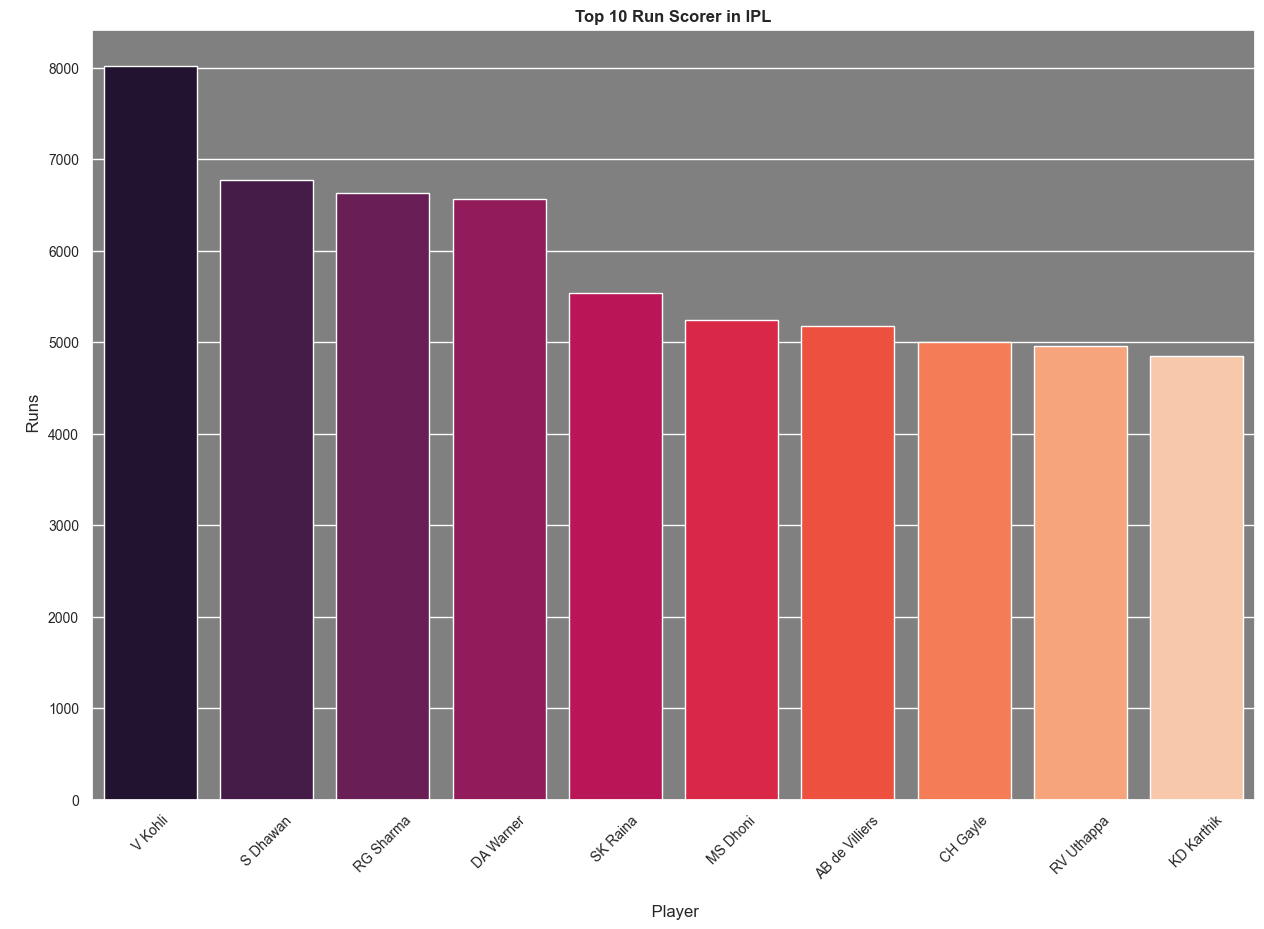

In [48]:
ax=plt.axes()
ax.set(facecolor='grey')
sbn.barplot(x=y['Batsman'],y=y['runs'],palette='rocket',saturation=1)
plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n Player')
plt.ylabel('\n Runs')
plt.title('Top 10 Run Scorer in IPL',fontweight='bold')